## 라이브러리

In [237]:
import pandas as pd
import seaborn as sns
import datetime
import numpy as np
import matplotlib.pyplot as plt

## 데이터

### 불러오기

In [238]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.shape, test.shape

((7500, 11), (7500, 10))

In [239]:
train.head()

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0


### 파생변수 만들기

```
   Column                    기존 타입  메모  
   
 1  Exercise_Duration         float64  시간 (분) 으로
 2  Body_Temperature(F)       float64  섭씨로
 3  BPM                       float64  
 4  Height(Feet)              float64  cm로
 5  Height(Remainder_Inches)  float64  cm로
 6  Weight(lb)                float64  몸무게
 7  Weight_Status             object   bmi (카테고리로)
 8  Gender                    object   카테고리로
 9  Age                       int64    
 10 Calories_Burned           float64  칼로리 소모량
 ```

In [240]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7500 non-null   object 
 1   Exercise_Duration         7500 non-null   float64
 2   Body_Temperature(F)       7500 non-null   float64
 3   BPM                       7500 non-null   float64
 4   Height(Feet)              7500 non-null   float64
 5   Height(Remainder_Inches)  7500 non-null   float64
 6   Weight(lb)                7500 non-null   float64
 7   Weight_Status             7500 non-null   object 
 8   Gender                    7500 non-null   object 
 9   Age                       7500 non-null   int64  
 10  Calories_Burned           7500 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 644.7+ KB


In [241]:
train.isnull().sum()

ID                          0
Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
Calories_Burned             0
dtype: int64

In [242]:
train.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age,Calories_Burned
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,104.033573,95.498133,5.248800,5.717600,165.361187,42.636000,89.373467
std,8.3553,1.412845,9.587331,0.556663,3.497315,33.308136,16.883188,62.817086
min,1.0000,98.800000,69.000000,4.000000,0.000000,79.400000,20.000000,1.000000
25%,8.0000,103.300000,88.000000,5.000000,3.000000,138.900000,28.000000,35.000000
50%,15.0000,104.400000,95.000000,5.000000,6.000000,163.100000,39.000000,77.000000
75%,23.0000,105.100000,103.000000,6.000000,9.000000,191.800000,56.000000,138.000000
max,30.0000,106.700000,128.000000,7.000000,12.000000,291.000000,79.000000,300.000000


In [243]:
# 중복된 값 제거 (train)

train = train[~(train['ID'] == 'TRAIN_4251')]
train.shape

(7499, 11)

In [244]:
# 파생변수 만들기 (train)

train['Body_Temperature(C)'] = round((train['Body_Temperature(F)'] - 32) * 5 / 9, 2)
train['Height(cm)'] = (train['Height(Feet)'] * 12 + train['Height(Remainder_Inches)']) * 2.54
train['Weight(kg)'] = train['Weight(lb)'] * 0.45359237

In [245]:
# 타입 변경 (train)

train['Weight_Status'] = train['Weight_Status'].astype('category')
train['Gender'] = train['Gender'].astype('category')

# train[['Exercise_Duration', 'BPM', 'Height(cm)', 'Weight(kg)',
#        'Body_Temperature(C)', 'Calories_Burned']] = train[['Exercise_Duration', 'BPM', 'Height(cm)', 'Weight(kg)',
#        'Body_Temperature(C)', 'Calories_Burned']].astype(int)

In [246]:
train = train[['ID', 'Exercise_Duration', 'BPM', 'Height(cm)',
                 'Weight(kg)', 'Weight_Status', 'Gender',
       'Age', 'Body_Temperature(C)', 'Calories_Burned']]


In [247]:
train.columns

Index(['ID', 'Exercise_Duration', 'BPM', 'Height(cm)', 'Weight(kg)',
       'Weight_Status', 'Gender', 'Age', 'Body_Temperature(C)',
       'Calories_Burned'],
      dtype='object')

In [248]:
train.head()

,ID,Exercise_Duration,BPM,Height(cm),Weight(kg),Weight_Status,Gender,Age,Body_Temperature(C),Calories_Burned
0,TRAIN_0000,26.0,107.0,175.26,69.989303,Normal Weight,F,45,40.89,166.0
1,TRAIN_0001,7.0,88.0,198.12,102.012924,Overweight,M,50,39.61,33.0
2,TRAIN_0002,7.0,86.0,190.50,99.019214,Overweight,M,29,39.61,23.0
3,TRAIN_0003,17.0,99.0,167.64,66.995593,Normal Weight,F,33,40.00,91.0
4,TRAIN_0004,9.0,88.0,177.80,77.019984,Normal Weight,M,38,39.28,32.0


In [249]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7499 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   7499 non-null   object  
 1   Exercise_Duration    7499 non-null   float64 
 2   BPM                  7499 non-null   float64 
 3   Height(cm)           7499 non-null   float64 
 4   Weight(kg)           7499 non-null   float64 
 5   Weight_Status        7499 non-null   category
 6   Gender               7499 non-null   category
 7   Age                  7499 non-null   int64   
 8   Body_Temperature(C)  7499 non-null   float64 
 9   Calories_Burned      7499 non-null   float64 
dtypes: category(2), float64(6), int64(1), object(1)
memory usage: 542.2+ KB


array([[<AxesSubplot:title={'center':'Exercise_Duration'}>,
        <AxesSubplot:title={'center':'BPM'}>,
        <AxesSubplot:title={'center':'Height(cm)'}>],
       [<AxesSubplot:title={'center':'Weight(kg)'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Body_Temperature(C)'}>],
       [<AxesSubplot:title={'center':'Calories_Burned'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

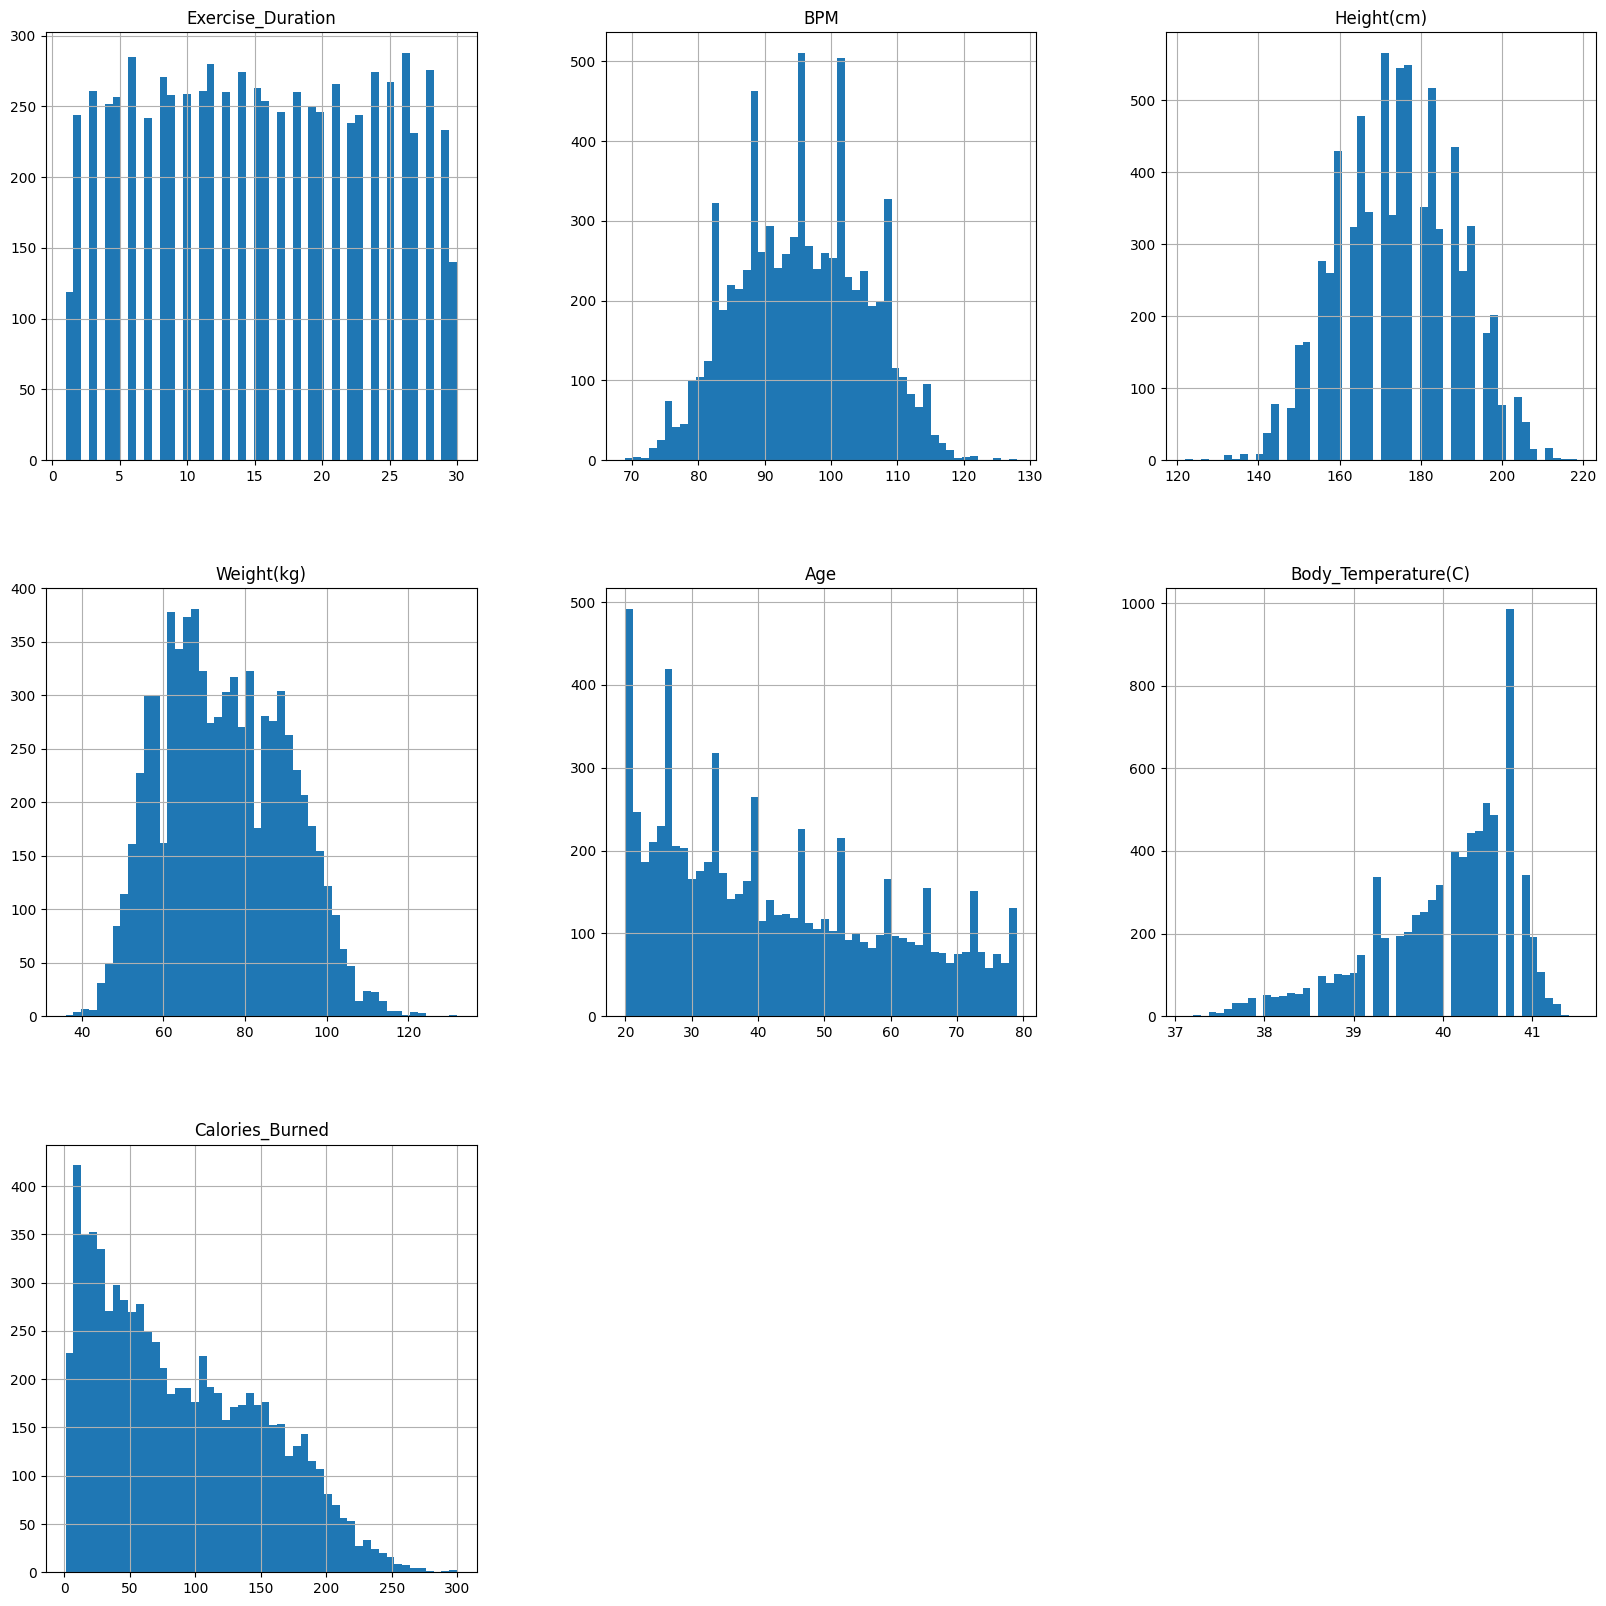

In [250]:
train.hist(bins=50, figsize=(20, 20))

In [251]:
# sns.violinplot(data=train[(train.dtypes == 'float64') | (train.dtypes == 'int64')])

In [252]:
# 파생변수 만들기 (test)


test['Body_Temperature(C)'] = round((test['Body_Temperature(F)'] - 32) * 5 / 9, 2)
test['Height(cm)'] = (test['Height(Feet)'] * 12 + test['Height(Remainder_Inches)']) * 2.54
test['Weight(kg)'] = test['Weight(lb)'] * 0.45359237




In [253]:
# 타입 변경 (test)

test['Weight_Status'] = test['Weight_Status'].astype('category')
test['Gender'] = test['Gender'].astype('category')

# test[['Exercise_Duration', 'BPM', 'Height(cm)', 'Weight(kg)',
#        'Body_Temperature(C)']] = test[['Exercise_Duration', 'BPM', 'Height(cm)', 'Weight(kg)',
#        'Body_Temperature(C)']].astype(int)

In [254]:
test = test[['ID', 'Exercise_Duration', 'BPM', 'Height(cm)',
                 'Weight(kg)', 'Weight_Status', 'Gender',
       'Age', 'Body_Temperature(C)']]


In [255]:
test.head()

,ID,Exercise_Duration,BPM,Height(cm),Weight(kg),Weight_Status,Gender,Age,Body_Temperature(C)
0,TEST_0000,26.0,107.0,154.94,51.981686,Normal Weight,F,45,40.61
1,TEST_0001,29.0,111.0,187.96,89.992726,Overweight,M,21,40.50
2,TEST_0002,11.0,90.0,175.26,77.019984,Normal Weight,M,58,40.00
3,TEST_0003,24.0,108.0,182.88,88.994823,Overweight,M,35,40.78
4,TEST_0004,29.0,116.0,170.18,66.995593,Normal Weight,F,67,41.11


In [256]:
train.shape, test.shape

((7499, 10), (7500, 9))

In [257]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   7500 non-null   object  
 1   Exercise_Duration    7500 non-null   float64 
 2   BPM                  7500 non-null   float64 
 3   Height(cm)           7500 non-null   float64 
 4   Weight(kg)           7500 non-null   float64 
 5   Weight_Status        7500 non-null   category
 6   Gender               7500 non-null   category
 7   Age                  7500 non-null   int64   
 8   Body_Temperature(C)  7500 non-null   float64 
dtypes: category(2), float64(5), int64(1), object(1)
memory usage: 425.2+ KB


### 인코딩

```
Weight_Status -> OrdinalEncoding
Gender -> One-Hot-Encoding
```

In [258]:
# OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Normal Weight', 'Overweight', 'Obese']])

train['Weight_Status'] = oe.fit_transform(train[['Weight_Status']])
test['Weight_Status'] = oe.transform(test[['Weight_Status']])

In [259]:
# OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

gender_encoded_train = ohe.fit_transform(train[['Gender']])
gender_encoded_test = ohe.fit_transform(test[['Gender']])

train['Male'] = gender_encoded_train[:, 1] # Male에 해당하는 열
train['Female'] = gender_encoded_train[:, 0] # Female에 해당하는 열

test['Male'] = gender_encoded_test[:, 1] # Male에 해당하는 열
test['Female'] = gender_encoded_test[:, 0] # Female에 해당하는 열

In [260]:
train.head()

,ID,Exercise_Duration,BPM,Height(cm),Weight(kg),Weight_Status,Gender,Age,Body_Temperature(C),Calories_Burned,Male,Female
0,TRAIN_0000,26.0,107.0,175.26,69.989303,0.0,F,45,40.89,166.0,0.0,1.0
1,TRAIN_0001,7.0,88.0,198.12,102.012924,1.0,M,50,39.61,33.0,1.0,0.0
2,TRAIN_0002,7.0,86.0,190.50,99.019214,1.0,M,29,39.61,23.0,1.0,0.0
3,TRAIN_0003,17.0,99.0,167.64,66.995593,0.0,F,33,40.00,91.0,0.0,1.0
4,TRAIN_0004,9.0,88.0,177.80,77.019984,0.0,M,38,39.28,32.0,1.0,0.0


In [261]:
train.columns

Index(['ID', 'Exercise_Duration', 'BPM', 'Height(cm)', 'Weight(kg)',
       'Weight_Status', 'Gender', 'Age', 'Body_Temperature(C)',
       'Calories_Burned', 'Male', 'Female'],
      dtype='object')

### PolynomialFeatures

In [265]:
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(interaction_only=True)

# poly_train = pd.DataFrame(poly.fit_transform(train.iloc[:, 1:])).iloc[:, 11:]
# poly_test = pd.DataFrame(poly.fit_transform(test.iloc[:, 1:])).iloc[:, 11:]

# poly_train

In [116]:
train = train[['Exercise_Duration', 'BPM', 'Height(cm)', 'Weight(kg)',
       'Weight_Status', 'Male', 'Female', 'Age', 'Body_Temperature(C)',
       'Calories_Burned']]

In [117]:
test = test[['Exercise_Duration', 'BPM', 'Height(cm)', 'Weight(kg)',
       'Weight_Status', 'Male', 'Female', 'Age', 'Body_Temperature(C)']]

In [118]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7499 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exercise_Duration    7499 non-null   float64
 1   BPM                  7499 non-null   float64
 2   Height(cm)           7499 non-null   float64
 3   Weight(kg)           7499 non-null   float64
 4   Weight_Status        7499 non-null   float64
 5   Male                 7499 non-null   float64
 6   Female               7499 non-null   float64
 7   Age                  7499 non-null   int64  
 8   Body_Temperature(C)  7499 non-null   float64
 9   Calories_Burned      7499 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 644.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exercise_Duration    7500 non-

(None, None)

In [119]:
train[['Exercise_Duration', 'BPM', 'Height(cm)',
                 'Weight(kg)', 'Weight_Status', 'Age', 'Body_Temperature(C)']].corr()

,Exercise_Duration,BPM,Height(cm),Weight(kg),Weight_Status,Age,Body_Temperature(C)
Exercise_Duration,1.000000,0.853483,-0.003215,0.002126,0.015471,0.017645,0.904350
BPM,0.853483,1.000000,0.006269,0.012482,0.021025,0.014637,0.770741
Height(cm),-0.003215,0.006269,1.000000,0.957822,0.407634,0.011108,0.002922
Weight(kg),0.002126,0.012482,0.957822,1.000000,0.564922,0.090425,0.007456
Weight_Status,0.015471,0.021025,0.407634,0.564922,1.000000,0.163403,0.014288
Age,0.017645,0.014637,0.011108,0.090425,0.163403,1.000000,0.016379
Body_Temperature(C),0.904350,0.770741,0.002922,0.007456,0.014288,0.016379,1.000000


<AxesSubplot:>

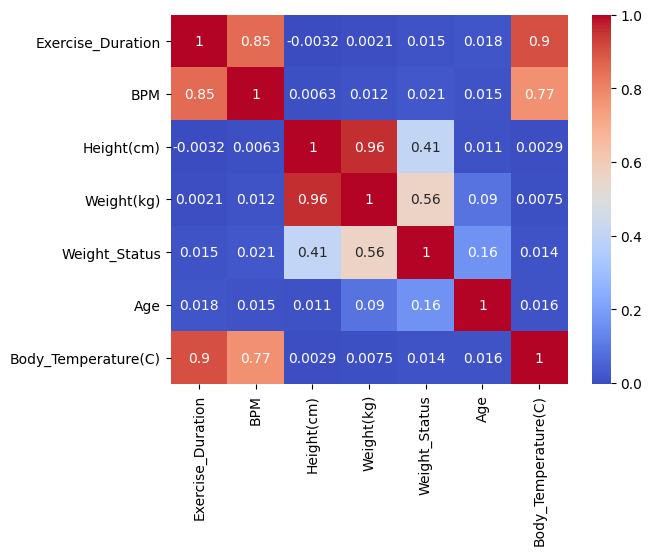

In [120]:
sns.heatmap(train[['Exercise_Duration', 'BPM', 'Height(cm)',
                 'Weight(kg)', 'Weight_Status', 'Age', 'Body_Temperature(C)']].corr(), cmap='coolwarm', annot=True)

## 데이터셋 나누기

In [121]:
X = train.drop(columns='Calories_Burned')
y = train['Calories_Burned']

X.shape, y.shape

((7499, 9), (7499,))

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
     X, y, test_size=0.1, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((6749, 9), (750, 9), (6749,), (750,))

In [123]:
# X_test = test

X_test = test
X_test.shape

(7500, 9)

## 딥러닝 모델 만들기

In [198]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [125]:
# # 1

# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)



# # model = tf.keras.Sequential([
# #     tf.keras.layers.BatchNormalization(input_shape=X_train.iloc[0].shape),
# #     tf.keras.layers.Dense(128, activation='relu'),
# #     tf.keras.layers.Dense(64, activation='relu'),
# #     tf.keras.layers.Dense(1)
# # ])

# model = tf.keras.Sequential([
# #     tf.keras.layers.BatchNormalization(input_shape=X_train.iloc[0].shape),
#     tf.keras.layers.Dense(units=128, activation='relu', input_shape=X_train.iloc[0].shape),
#     tf.keras.layers.Dropout(0.1),
# #     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(units=1)
# ])

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer,
#               loss='mse',
#               metrics=['mse',tf.keras.metrics.RootMeanSquaredError()])


In [71]:
# # 2

# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=100)

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(137, activation='gelu', input_shape=X_train.iloc[0].shape),
#     tf.keras.layers.Dense(72, activation='gelu'),
#     tf.keras.layers.Dense(36, activation='gelu'),
#     tf.keras.layers.Dense(1),
# ])

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer,
#               loss='mse',
#               metrics=['mse',tf.keras.metrics.RootMeanSquaredError()])




In [215]:
# 3

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=X_train.iloc[0].shape),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

optimizer = tf.keras.optimizers.Adam(0.001)

model.compile(loss="mse", 
              optimizer=optimizer, 
              metrics=["mse", "mae", tf.keras.metrics.RootMeanSquaredError()]
              )




In [216]:
# # 4

# def build_model():
#   model = keras.Sequential([
#     layers.Dense(64, activation='relu', input_shape=X_train.iloc[0].shape),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(1)
#   ])

#   optimizer = tf.keras.optimizers.RMSprop(0.001)

#   model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
#   return model

# model = build_model()

In [236]:
# 5. PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(interaction_only=True)

poly_train = pd.DataFrame(poly.fit_transform(train.iloc[:, 1:]), index=[train.index])
poly_test = pd.DataFrame(poly.fit_transform(test.iloc[:, 1:]), index=[test.index])

poly_train

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,1.0,107.0,175.26,69.989303,0.0,0.0,1.0,45.0,40.89,166.0,...,0.0,0.0,0.00,0.0,45.0,40.89,166.0,1840.05,7470.0,6787.74
1,1.0,88.0,198.12,102.012924,1.0,1.0,0.0,50.0,39.61,33.0,...,0.0,50.0,39.61,33.0,0.0,0.00,0.0,1980.50,1650.0,1307.13
2,1.0,86.0,190.50,99.019214,1.0,1.0,0.0,29.0,39.61,23.0,...,0.0,29.0,39.61,23.0,0.0,0.00,0.0,1148.69,667.0,911.03
3,1.0,99.0,167.64,66.995593,0.0,0.0,1.0,33.0,40.00,91.0,...,0.0,0.0,0.00,0.0,33.0,40.00,91.0,1320.00,3003.0,3640.00
4,1.0,88.0,177.80,77.019984,0.0,1.0,0.0,38.0,39.28,32.0,...,0.0,38.0,39.28,32.0,0.0,0.00,0.0,1492.64,1216.0,1256.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,1.0,104.0,147.32,50.983782,0.0,0.0,1.0,75.0,40.61,151.0,...,0.0,0.0,0.00,0.0,75.0,40.61,151.0,3045.75,11325.0,6132.11
7496,1.0,104.0,172.72,66.995593,0.0,0.0,1.0,21.0,40.72,114.0,...,0.0,0.0,0.00,0.0,21.0,40.72,114.0,855.12,2394.0,4642.08
7497,1.0,90.0,187.96,91.988533,1.0,1.0,0.0,57.0,39.50,41.0,...,0.0,57.0,39.50,41.0,0.0,0.00,0.0,2251.50,2337.0,1619.50
7498,1.0,97.0,175.26,76.022081,1.0,1.0,0.0,35.0,40.22,57.0,...,0.0,35.0,40.22,57.0,0.0,0.00,0.0,1407.70,1995.0,2292.54


In [218]:
# train_agg = pd.concat([train.drop(columns=['Calories_Burned']), poly_train], axis=1)
# test_agg = pd.concat([test, poly_test], axis=1)

In [219]:
# train_agg

In [220]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 128)               1280      
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,649
Trainable params: 11,649
Non-trainable params: 0
_________________________________________________________________


## 학습

In [221]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: 
            print('')
        print('.', end='')

In [202]:
# history = model.fit(
#   X_train, y_train,
#   epochs=1000, verbose=0,
#   callbacks=[PrintDot()])
# history


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [222]:
history = model.fit(X_train, y_train, 
                    epochs=1000, 
                    batch_size=64,
                     callbacks=[earty_stop, PrintDot()],
                    verbose=0)
history











.

In [223]:
# df_hist

df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,mse,mae,root_mean_squared_error
995,1.924658,1.924658,0.970944,1.387320
996,2.444893,2.444893,1.110094,1.563615
997,2.123768,2.123768,1.025573,1.457315
998,2.112768,2.112768,1.044537,1.453536
999,2.131932,2.131932,1.041239,1.460114


<AxesSubplot:>

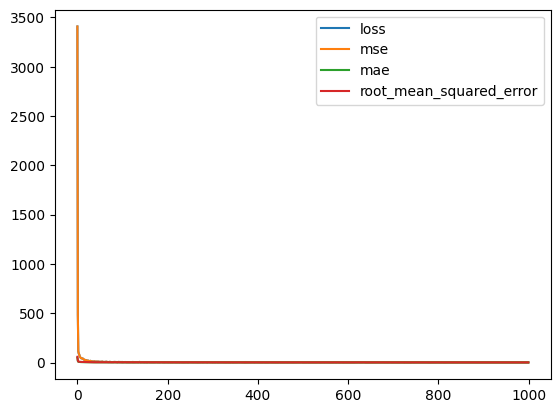

In [224]:
# plot

df_hist.plot()

## 평가

In [225]:
# loss, mae, mse = model.evaluate

model.evaluate(X_valid, y_valid)

24/24 [==============================] - 0s 1ms/step - loss: 2.5818 - mse: 2.5818 - mae: 1.1321 - root_mean_squared_error: 1.6068


[2.5818264484405518, 2.5818264484405518, 1.132082462310791, 1.6068062782287598]

In [226]:
# predict
# y_valid_pred

y_valid_pred = model.predict(X_valid).flatten()
y_valid_pred

24/24 [==============================] - 0s 931us/step


array([ 65.872826 ,  41.969204 ,  51.69297  ,  49.462902 , 210.79533  ,
         3.2333264,   8.103451 , 119.08797  , 123.64723  ,   6.4944296,
       109.179825 , 143.51775  , 185.46465  ,  78.405136 , 152.1889   ,
       190.72981  ,  61.16706  , 130.1519   ,   8.481736 ,  34.406258 ,
        49.820248 ,  53.800003 ,  28.012009 ,  16.803795 , 126.60955  ,
       148.52214  ,  13.61342  ,  45.840797 , 125.17474  , 183.31519  ,
       165.01993  ,   7.960961 , 165.34332  , 122.553925 , 109.10206  ,
        29.890364 ,  74.03534  ,  61.303024 ,  43.54112  , 161.5086   ,
        74.50891  , 108.34628  , 108.87263  ,  79.75542  ,  53.015827 ,
        74.305984 ,  35.539898 ,  14.440559 , 259.5011   ,  39.56369  ,
        55.155045 ,  34.86189  ,  67.46651  ,  91.1557   , 172.55675  ,
        42.512104 ,  99.300415 ,  31.729046 ,  15.532443 , 137.96428  ,
       145.25359  , 207.973    ,  28.09316  ,  27.77529  ,  64.45083  ,
        68.30231  , 150.29451  ,  63.574306 ,  35.293983 ,  47.1

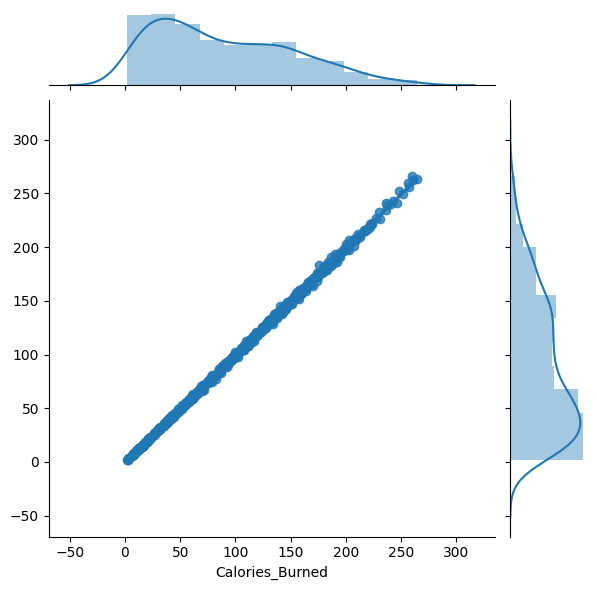

In [227]:
# jointplot
sns.jointplot(x=y_valid, y=y_valid_pred, kind="reg")

In [228]:
# rmse

rmse = np.sqrt(((y_valid - y_valid_pred) ** 2).mean())
rmse

1.6068059607633283

## 예측

In [229]:
# predict

y_predict = model.predict(X_test).flatten()
y_predict[:5]

235/235 [==============================] - 0s 1ms/step


array([172.93105 , 191.66702 ,  52.878826, 159.01482 , 224.20753 ],
      dtype=float32)

## 제출

In [230]:
submission = pd.read_csv('sample_submission.csv')

In [231]:
submission["Calories_Burned"] = y_predict

In [232]:
file_name = f"submit_tf_{rmse}.csv"
file_name

'submit_tf_1.6068059607633283.csv'

In [233]:
submission.to_csv(file_name, index=False)
pd.read_csv(file_name).head(2)

,ID,Calories_Burned
0,TEST_0000,172.93105
1,TEST_0001,191.66702
